## Problem Set 6
### MACS 30100, Dr. Evans
### Leoson Hoay

**Importing necessary packages:**

In [16]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

### Problem (1) 
**Decision Trees.**

**(a)**

In [2]:
biden_df = pd.read_csv('../../../ProblemSets/PS6/biden.csv')

In [3]:
biden_df.isnull().sum()

biden     0
female    0
age       0
educ      0
dem       0
rep       0
dtype: int64

In [4]:
X = biden_df[['female', 'age', 'educ', 'dem', 'rep']].values
y = biden_df['biden'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state= 1125)
tree_1 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

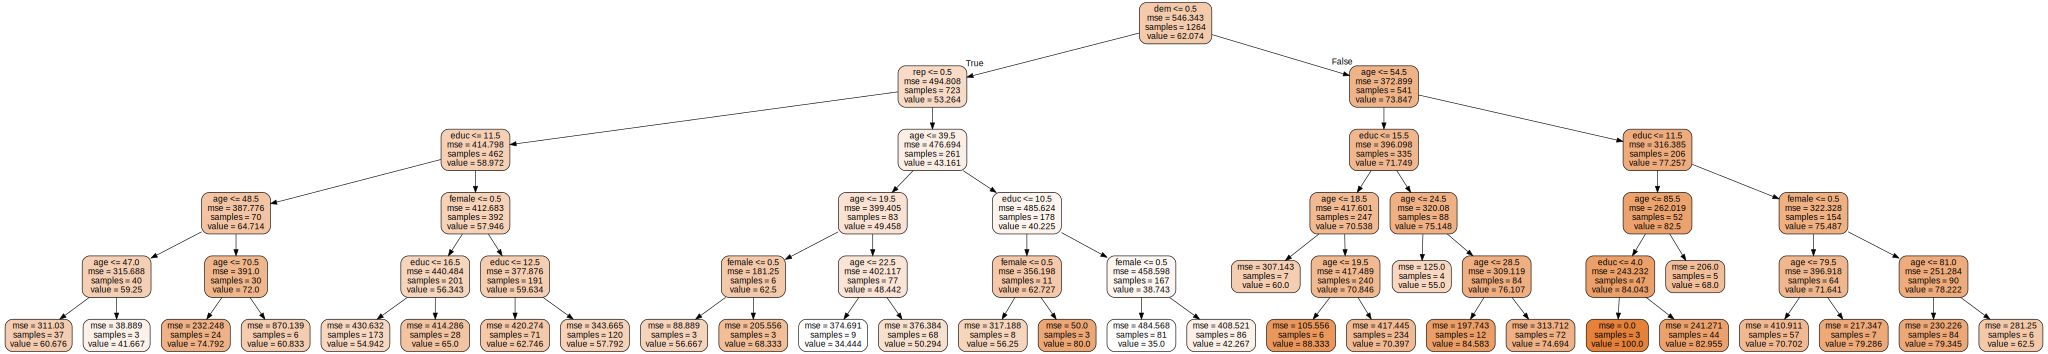

In [5]:
tree1_viz = export_graphviz(tree_1, out_file=None, rounded=True, filled=True, 
                            feature_names=np.array(['female', 'age', 'educ', 'dem', 'rep']))

graph = graphviz.Source(tree1_viz)
graph.render('tree1_viz')
graph

The decision tree seems to indicate that the first split in attitudes is influenced by Democrat/Non-Democrat alignment, where Democrats hold warmer attitudes to Biden than non-democrats. Among the non-Democrats, non-Republicans hold warmer attitudes towards Biden than Republicans.

As a whole, females in all of the camps generally seem to hold warmer attitudes towards Biden than males.

In [6]:
y_pred = tree_1.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print(MSE1)

403.05415458796193


The test MSE is approximately **403.05**.

**(b)**

In [7]:
# Cross-validate
for d in range(1,20):
    biden_tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=d)
    biden_tree2.fit(X_train, y_train)
    y_pred2 = biden_tree2.predict(X_test)
    MSE2 = mean_squared_error(y_test, y_pred2)
    print(d, "->", MSE2)

1 -> 412.70591233046497
2 -> 378.93605507914685
3 -> 383.8539084577303
4 -> 388.0743965772161
5 -> 395.84069538044423
6 -> 415.38659457928355
7 -> 424.1743741520253
8 -> 442.2075079105863
9 -> 460.16838722352355
10 -> 468.86024811858755
11 -> 479.78613515474603
12 -> 486.7127084892698
13 -> 494.01378555835544
14 -> 495.14615032869574
15 -> 495.6728842677853
16 -> 495.09980287627104
17 -> 494.8315631064527
18 -> 494.8315631064527
19 -> 495.3163979243577


The lowest MSE results from a tree with max depth of 2.

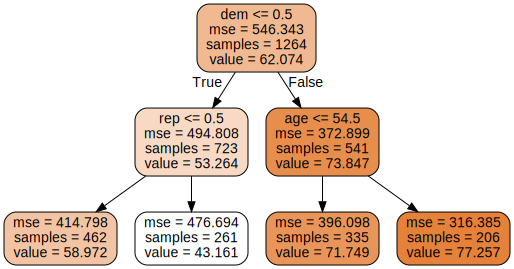

In [8]:
tree_2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=2)
tree_2.fit(X_train, y_train)
tree2_viz = export_graphviz(tree_2, out_file=None, rounded=True, filled=True, 
                            feature_names=np.array(['female', 'age', 'educ', 'dem', 'rep']))

graph = graphviz.Source(tree2_viz)
graph.render('tree2_viz')
graph

In [9]:
y_pred3 = tree_2.predict(X_test)
MSE3 = mean_squared_error(y_test, y_pred3)
print(MSE3)

378.93605507914685


**The MSE does improve from ~ 403.05 to ~ 378.94**. In this tree, the first splits remain similar, between Democrats and non-Democrats, while the non-Democrats are split by Republican and Non-Republican, and Democrats older than 54.5 years of age hold warmer attitudes towards Biden than those younger than or equal to 54.5. 

**(c)**

In [10]:
tree_3 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, max_samples=100, bootstrap=True, oob_score=True, 
                          random_state=1125)
tree_3.fit(X, y)

# adapted from notebook
tree_3.fit(X, y)
tree_3.score(X, y)
y_pred4 = tree_3.oob_prediction_
MSE4 = mean_squared_error(y, y_pred4)
print(MSE4)

405.4256910561463


The test MSE is approximately **405.43**.

In [11]:
importances = np.mean([tree.feature_importances_ for tree in tree_3.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

features = ['female', 'age', 'dem', 'rep', 'educ']
for f in range(len(features)):
    print(features[indices[f]],':', importances[indices[f]])

age : 0.4404339115413049
dem : 0.19500584254289866
rep : 0.18258406671864433
educ : 0.11579252008013827
female : 0.06618365911701385


According to the variable importances, age seems to be the most important variable, followed by being a democrat and a being a republican. This is then followed by education and being female.

**(d)**

In [12]:
# m = 1
tree_4 = RandomForestRegressor(max_features = 1, n_estimators=53,  bootstrap=True, oob_score=True, random_state=1125)
tree_4.fit(X, y)
y_pred5 = tree_4.oob_prediction_
MSE5 = mean_squared_error(y, y_pred5)

# m = 2
tree_5 = RandomForestRegressor(max_features = 2, n_estimators=53,  bootstrap=True, oob_score=True, random_state=1125)
tree_5.fit(X, y)
y_pred6 = tree_5.oob_prediction_
MSE6 = mean_squared_error(y, y_pred6)

# m = 3
tree_6 = RandomForestRegressor(max_features = 3, n_estimators=53,  bootstrap=True, oob_score=True, random_state=1125)
tree_6.fit(X, y)
y_pred7 = tree_6.oob_prediction_
MSE7 = mean_squared_error(y, y_pred7)

print('m = 1, MSE=', MSE5)
print('m = 2, MSE=', MSE6)
print('m = 3, MSE=', MSE7)

m = 1, MSE= 544.9675250761956
m = 2, MSE= 540.7449084227296
m = 3, MSE= 536.4801110373542


According to the results, the **test MSE seems to get better as the max features allowed increases.**

In [13]:
# m = 1 importances
importances2 = np.mean([tree.feature_importances_ for tree in tree_4.estimators_], axis=0)
indices2 = np.argsort(importances2)[::-1]
for f in range(len(features)):
    print(features[indices[f]],':', importances2[indices[f]])

age : 0.5115759036151771
dem : 0.14749085430081496
rep : 0.19177767667547907
educ : 0.12543675813592464
female : 0.02371880727260408


In [14]:
# m = 2 importances
importances3 = np.mean([tree.feature_importances_ for tree in tree_5.estimators_], axis=0)
indices3 = np.argsort(importances3)[::-1]
for f in range(len(features)):
    print(features[indices[f]],':', importances3[indices[f]])

age : 0.5070563471626159
dem : 0.14954720399636007
rep : 0.19541242461978475
educ : 0.12344824298859232
female : 0.024535781232646953


In [15]:
# m = 3 importances
importances4 = np.mean([tree.feature_importances_ for tree in tree_6.estimators_], axis=0)
indices4 = np.argsort(importances4)[::-1]
for f in range(len(features)):
    print(features[indices[f]],':', importances4[indices[f]])

age : 0.4850926489323459
dem : 0.16353757098351063
rep : 0.21387117477476475
educ : 0.1081217454069777
female : 0.029376859902400965


As the max features change, **age remains the most important variable**. The ranking of the other variables remain constant across the different number of max features - age, then being a Democrat, then being a Republican, followed by education, and lastly being female.